# Perform Dimensionality reduction and visualization

In [1]:
import pandas as pd

In [2]:
# Load the dataset tf-idf with clusters
df = pd.read_csv('tfidf_matrix_clustered.csv')
# Drop redundant index column
df.drop('Unnamed: 0', axis =1, inplace = True)

# Load the dataset with text features and clusters
df2 = pd.read_csv('df_clustered.csv')
df2.drop('Unnamed: 0', axis =1, inplace = True)

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


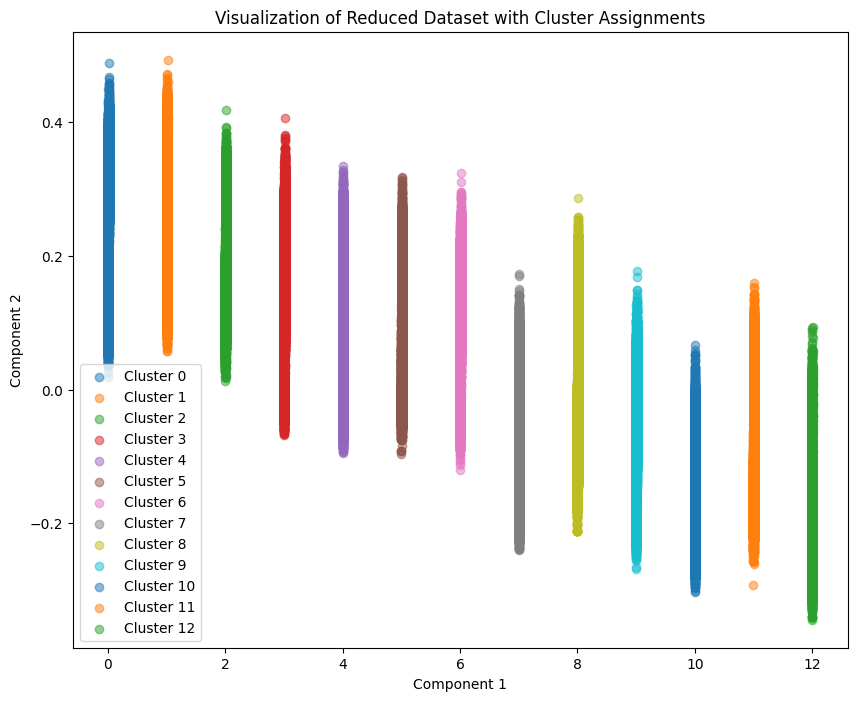

In [3]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import numpy as np

# Initialize TruncatedSVD with desired number of components
svd = TruncatedSVD(n_components=2)  # Reduced to 2 dimensions for visualization

# Fit TruncatedSVD to the TF-IDF matrix and transform the data
df_svd = svd.fit_transform(df)

# Plot the reduced dataset with points colored by cluster
plt.figure(figsize=(10, 8))
for cluster_label in np.unique(df['KMeans_Cluster']):
    plt.scatter(df_svd[df['KMeans_Cluster'] == cluster_label][:, 0],
                df_svd[df['KMeans_Cluster'] == cluster_label][:, 1],
                label=f'Cluster {cluster_label}', alpha=0.5)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Visualization of Reduced Dataset with Cluster Assignments')
plt.legend()
plt.show()

## 2D Visualization

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


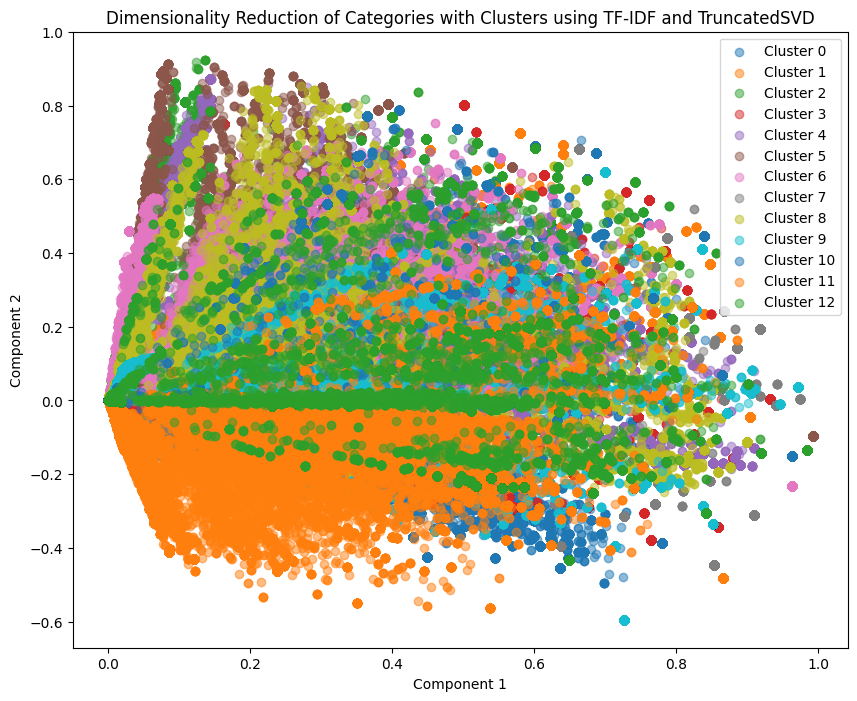

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Split DataFrame into smaller chunks with 100000 categories for each cluster
cluster_categories_df = df2[['KMeans_Cluster', 'cleaned_categories']]
chunks = []
for cluster_label in sorted(cluster_categories_df['KMeans_Cluster'].unique()):
    cluster_chunk = cluster_categories_df[cluster_categories_df['KMeans_Cluster'] == cluster_label].head(100000)
    chunks.append(cluster_chunk)

# Step 2-4: Apply TF-IDF, Add cluster labels, Reduce dimensionality
svd_transformed = None
for chunk in chunks:
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(chunk['cleaned_categories'])
    
    # Dimensionality reduction using TruncatedSVD
    svd = TruncatedSVD(n_components=2)  # Reduce to 2 dimensions for visualization
    svd_chunk = svd.fit_transform(tfidf_matrix)
    
    # Add cluster labels back to the reduced matrix
    cluster_labels = np.full((len(svd_chunk), 1), chunk.iloc[0]['KMeans_Cluster'])
    svd_chunk_with_labels = np.concatenate((svd_chunk, cluster_labels), axis=1)
    
    # Concatenate chunk results
    if svd_transformed is None:
        svd_transformed = svd_chunk_with_labels
    else:
        svd_transformed = np.concatenate((svd_transformed, svd_chunk_with_labels), axis=0)

# Plot the reduced dataset in 2D
plt.figure(figsize=(10, 8))
for cluster_label in sorted(cluster_categories_df['KMeans_Cluster'].unique()):
    cluster_data = svd_transformed[svd_transformed[:, -1] == cluster_label]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_label}', alpha=0.5)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Dimensionality Reduction of Categories with Clusters using TF-IDF and TruncatedSVD')
plt.legend()
plt.show()


## 3D Visualization

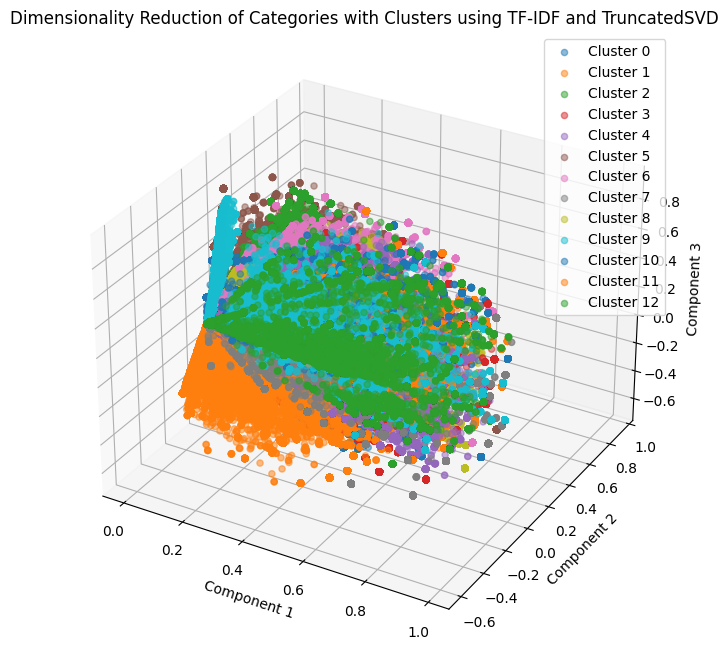

In [5]:
# Step 1: Split DataFrame into smaller chunks with 100000 categories for each cluster
cluster_categories_df = df2[['KMeans_Cluster', 'cleaned_categories']]
chunks = []
for cluster_label in sorted(cluster_categories_df['KMeans_Cluster'].unique()):
    cluster_chunk = cluster_categories_df[cluster_categories_df['KMeans_Cluster'] == cluster_label].head(100000)
    chunks.append(cluster_chunk)

# Step 2-4: Apply TF-IDF, Add cluster labels, Reduce dimensionality
svd_transformed = None
for chunk in chunks:
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(chunk['cleaned_categories'])
    
    # Dimensionality reduction using TruncatedSVD
    svd = TruncatedSVD(n_components=3)
    svd_chunk = svd.fit_transform(tfidf_matrix)
    
    # Add cluster labels back to the reduced matrix
    cluster_labels = np.full((len(svd_chunk), 1), chunk.iloc[0]['KMeans_Cluster'])
    svd_chunk_with_labels = np.concatenate((svd_chunk, cluster_labels), axis=1)
    
    # Concatenate chunk results
    if svd_transformed is None:
        svd_transformed = svd_chunk_with_labels
    else:
        svd_transformed = np.concatenate((svd_transformed, svd_chunk_with_labels), axis=0)

# Plot the reduced dataset in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for cluster_label in sorted(cluster_categories_df['KMeans_Cluster'].unique()):
    cluster_data = svd_transformed[svd_transformed[:, -1] == cluster_label]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], label=f'Cluster {cluster_label}', alpha=0.5)

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('Dimensionality Reduction of Categories with Clusters using TF-IDF and TruncatedSVD')
ax.legend()
plt.show()

In [6]:
"A DataFrame containing clusters and categories they belong to"

# Group by 'KMeans_Cluster' and aggregate categories
clusters_and_categories = df2.groupby('KMeans_Cluster')['cleaned_categories'].apply(lambda x: ', '.join(x)).reset_index()

# Rename columns for clarity
clusters_and_categories.columns = ['cluster_number', 'categories']

# Display the DataFrame
clusters_and_categories

,cluster_number,categories
0,0,"math.co, math.ca math.fa, math.nt math.ag, mat..."
1,1,"astro-ph, cs.cv, physics.ed-ph, cs.lg cs.ai, c..."
2,2,"math.co cs.cg, math.co, math-ph math.gt math.m..."
3,3,"hep-ph, physics.gen-ph, hep-th, hep-ph, hep-ex..."
4,4,"cond-mat.mes-hall, cond-mat.mtrl-sci, nlin.ps ..."
5,5,"gr-qc, q-bio.pe q-bio.cb quant-ph, math.qa mat..."
6,6,"nlin.ps nlin.si, math-ph math.mp, cond-mat.sof..."
7,7,"astro-ph, astro-ph, astro-ph, astro-ph, astro-..."
8,8,"physics.optics physics.comp-ph, physics.optics..."
9,9,"astro-ph, cond-mat.str-el, cond-mat.other cond..."


In [7]:
import json

# Load categories from JSON file
with open('categories.json', 'r') as file:
    categories_data = json.load(file)

# Create a DataFrame from alias and name
categories_df = pd.DataFrame(categories_data)

# Rename columns for clarity
categories_df.columns = ['alias', 'categ_name']
categories_df

,alias,categ_name
0,cs.AI,Artificial Intelligence
1,cs.AR,Hardware Architecture
2,cs.CC,Computational Complexity
3,cs.CE,"Computational Engineering, Finance, and Science"
4,cs.CG,Computational Geometry
...,...,...
156,stat.CO,Computation
157,stat.ME,Methodology
158,stat.ML,Machine Learning
159,stat.OT,Other Statistics
